In [126]:
import pandas as pd
import numpy as np
import pickle
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

path = './Data/Pickle Files/Processed_Dataframes/'

In [127]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

In [128]:
with open(path+'features.pickle', 'rb') as f:
    feature_df = pickle.load(f)

In [129]:
with open(path+'disease_Proc_df.pickle', 'rb') as f:
    disease_df = pickle.load(f)

In [130]:
feature_df

,Year,State,Tax,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,PRECIP,N_WET_NH4,N_WET_NO3,N_WET,N_DRY_HNO3,N_DRY_NO3,N_DRY_TNO3,N_DRY_NH4,N_DRY_NH3,N_DRY_NH3NET,N_DRY_NOM,N_DRY_NRED,N_DRY_NOXI,N_DRY,S_WET_SO4,S_WET,S_DRY_SO2,S_DRY_SO4,S_DRY,NA_DRY,NA_WET,MG_DRY,MG_WET,K_DRY,K_WET,CA_DRY,CA_WET,CL_DRY,CL_WET
0,2001,AL,6747707.0,4785437,2322988,2462449,1657051,1708508,587969,673265,16787,16096,26475,29246,2931,2236,31775,33098,1685590,1737861,602300,688725,31614,31442,32945,36006,4234,3719,2219208,2380041,1570120,1639766,581110,667181,12868,13271,25547,28540,1044,980,28519,30303,1595896,1666780,593948,681290,25967,27204,31378,34691,2003,2131,103780,82408,86931,68742,6859,6084,3919,2825,928,706,1887,1256,3256,2795,89694,71081,8352,7435,5647,4238,1567,1315,2231,1588,131.225000,2.506000,2.165000,4.67200,4.173000,0.286000,4.460000,0.398000,1.535000,0.791000,1.932000,1.933000,6.391000,8.324000,4.921000,4.921000,6.638000,0.318000,6.956000,0.196000,1.27300,0.046000,0.2230,0.060000,0.551000,0.184000,0.866000,0.106000,2.245000
1,2001,AR,4986747.0,2921964,1434724,1487240,1159262,1187080,216407,238623,13178,13073,17947,20008,3573,3235,24357,25221,1181927,1210463,225508,248179,26094,26536,22225,24394,4576,4239,1334757,1399725,1069598,1108709,213186,235651,10003,10377,17181,19327,2952,2803,21837,22858,1089955,1129934,221472,244476,21388,22340,20970,23271,3745,3615,99967,87515,89664,78371,3221,2972,3175,2696,766,681,621,432,2520,2363,91972,80529,4036,3703,4706,4196,1255,1123,831,624,151.199000,1.507000,2.241000,3.74800,3.314000,0.077000,3.391000,0.233000,1.217000,0.678000,1.516000,1.450000,4.907000,6.356000,4.147000,4.147000,1.446000,0.244000,1.690000,0.208000,1.44200,0.038000,0.2400,0.048000,0.526000,0.135000,1.754000,0.092000,2.448000
2,2001,AZ,8360376.0,6407172,3183922,3223250,2696389,2731840,147100,135101,166315,170237,88871,101197,8736,7438,76511,77437,2764637,2801049,175874,164602,195792,200093,115867,128081,14823,13710,2227904,2275834,1832998,1874603,127328,114756,126085,132838,80886,93087,6227,4972,54380,55578,1881277,1924208,148948,136943,143929,151411,101659,113694,10680,9669,956018,947416,863391,857237,19772,20345,40230,37399,7985,8110,2509,2466,22131,21859,883360,876841,26926,27659,51863,48682,14208,14387,4143,4041,34.533333,0.549667,0.827333,1.37700,1.498000,0.107333,1.605667,0.113667,0.365667,0.131667,0.253000,0.479333,1.858333,2.337667,0.823667,0.823667,0.369667,0.104333,0.474333,0.126333,0.23300,0.035333,0.0950,0.038667,0.140667,0.269667,0.934667,0.044000,0.423667
3,2001,CA,90453746.0,37319502,18545938,18773564,13871272,13797795,1225792,1260514,317587,305568,2401000,2660686,90582,91510,639705,657491,14431194,14370439,1406290,1452701,515335,513789,2735187,2998110,158158,162417,11444589,11812292,7476718,7540429,1079499,1106783,81451,83010,2291144,2548642,66055,67172,449722,466256,7866977,7942953,1208391,1245386,186916,199270,2553652,2813588,115621,119703,7101349,6961272,6394554,6257366,146293,153731,236136,222558,109856,112044,24527,24338,189983,191235,6564217,6427486,197899,207315,328419,314519,181535,184522,42537,42714,58.153625,1.176000,0.892625,2.06875,3.764625,0.248125,4.012500,0.226250,2.296750,2.054875,0.449625,2.522625,4.462250,6.984875,0.590750,0.590750,0.419875,0.124625,0.544375,0.288750,0.73975,0.058000,0.1050,0.070250,0

In [34]:
disease_df

,State,StateDesc,Year,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
0,AK,Alaska,2008,11.500000,108.950000,124.350000,7.300000,42.100000,59.300000,12.700000
1,AK,Alaska,2009,11.625000,104.125000,123.925000,7.125000,42.050000,58.275000,13.050000
2,AK,Alaska,2010,11.616667,99.566667,124.733333,6.833333,41.650000,57.283333,13.466667
3,AK,Alaska,2011,11.637500,94.937500,125.225000,6.875000,41.350000,56.562500,13.637500
4,AK,Alaska,2012,11.620000,92.220000,125.000000,6.950000,41.110000,55.990000,13.840000
...,...,...,...,...,...,...,...,...,...,...
619,WY,Wyoming,2015,11.080000,119.840000,123.400000,7.060000,35.360000,46.700000,24.890000
620,WY,Wyoming,2016,11.212500,121.737500,123.837500,7.075000,35.450000,46.587500,25.200000
621,WY,Wyoming,2017,11.416667,125.483333,124.333333,7.450000,35.633333,46.333333,25.700000
622,WY,Wyoming,2018,11.475000,128.225000,125.150000,7.900000,36.150000,46.475000,26.325000


In [131]:
df = pd.merge(feature_df, disease_df, on=['Year', 'State'])

# Correlation

In [35]:
from scipy.stats import pearsonr

corr_matrix = df.corr()

alpha = 0.05

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr, p_value = pearsonr(corr_matrix.iloc[:, i], corr_matrix.iloc[:, j])
        if p_value < alpha and corr_matrix.columns[i].startswith('CAN5_1'):
            print(f"Correlation between {corr_matrix.columns[i]} and {corr_matrix.columns[j]} is significant (p-value: {p_value:.3f})")

Correlation between CAN5_1 and Tax is significant (p-value: 0.000)
Correlation between CAN5_1 and TOT_POP is significant (p-value: 0.000)
Correlation between CAN5_1 and TOT_MALE is significant (p-value: 0.000)
Correlation between CAN5_1 and TOT_FEMALE is significant (p-value: 0.000)
Correlation between CAN5_1 and WA_MALE is significant (p-value: 0.000)
Correlation between CAN5_1 and WA_FEMALE is significant (p-value: 0.000)
Correlation between CAN5_1 and BA_MALE is significant (p-value: 0.000)
Correlation between CAN5_1 and BA_FEMALE is significant (p-value: 0.000)
Correlation between CAN5_1 and IA_MALE is significant (p-value: 0.000)
Correlation between CAN5_1 and IA_FEMALE is significant (p-value: 0.000)
Correlation between CAN5_1 and AA_MALE is significant (p-value: 0.000)
Correlation between CAN5_1 and AA_FEMALE is significant (p-value: 0.000)
Correlation between CAN5_1 and NA_MALE is significant (p-value: 0.000)
Correlation between CAN5_1 and NA_FEMALE is significant (p-value: 0.0

<AxesSubplot:>

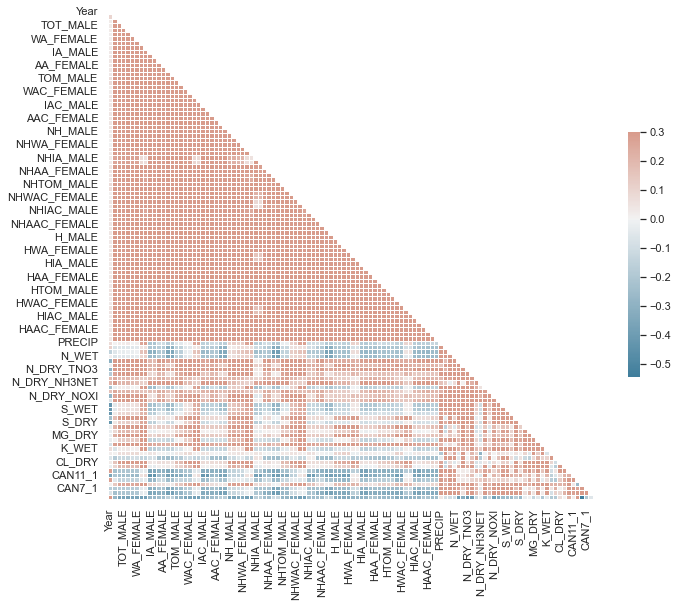

In [27]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Splitting Dataset

In [132]:
state_list = df['State'].unique()
seq_length = 2
seq_length_plus_diff = seq_length+1

df = df.drop(['StateDesc'], axis=1)
df = df.sort_values(by='Year')
df = df.reset_index(drop=True)

In [133]:
min_year_val = 2016
min_year_test = 2019

train_data = df[df['Year'] < min_year_val].copy()
val_data = df[(df['Year'] >= min_year_val-seq_length_plus_diff) & (df['Year'] < min_year_test)].copy()
test_data = df[df['Year'] >= min_year_test-seq_length_plus_diff].copy()

In [138]:
val_data_compare_acc = val_data[(val_data['Year'] >= min_year_val) & (val_data['Year'] < min_year_test) ]
test_data_compare_acc = test_data[test_data['Year'] >= min_year_test]

# Differencing

In [86]:
def df_diff(df):
    
    Base_Year = np.min(df['Year'])
    
    Base_row = df[df['Year'] == Base_Year]
    
    df_diff = pd.DataFrame()

    for state in state_list:

        df_state = df[df['State'] == state]
        df_state_diff = df_state.iloc[:,2:].diff().dropna()
        df_state = pd.concat([df_state[['Year', 'State']] , df_state_diff ], axis=1)
        df_state.dropna(inplace=True)

        df_diff = pd.concat([df_diff, df_state], axis=0)
    
    df['Year'] = df['Year'] + 1
    base_df = df 
    df = df_diff
    
    return base_df, df

In [87]:
base_df_train, train_data = df_diff(train_data)
base_df_val,val_data = df_diff(val_data)
base_df_test,test_data = df_diff(test_data)

# Normalizing

In [59]:
scaler_train = MinMaxScaler(feature_range=(-1, 1))
scaler_val = MinMaxScaler(feature_range=(-1, 1))
scaler_test = MinMaxScaler(feature_range=(-1, 1))

In [60]:
#columns_to_normalize = list(df.columns[2:-8])

# To standardize the target columns as well

columns_to_normalize = list(df.columns[2:])




train_data[columns_to_normalize] = scaler_train.fit_transform(train_data[columns_to_normalize])

val_data[columns_to_normalize] = scaler_val.fit_transform(val_data[columns_to_normalize])

test_data[columns_to_normalize] = scaler_test.fit_transform(test_data[columns_to_normalize])


df_cols = list(df.columns)
input_cols = [c for c in df_cols if c not in ['Year','State','StateDesc','CAN10_1','CAN11_1','CAN5_1','CAN6_1','CAN7_1','CAN8_1','CAN9_1']]

# RNN

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from keras.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

For adding the features from previous Years

In [62]:
def create_sequences(data, seq_length,target_col):
    
    df_cols = list(df.columns)
    
    output_cols = [target_col]


    X = []
    y = []
    
    for i in range(seq_length, len(data)):
        X.append(data.loc[i-seq_length:i, input_cols].values)
        y.append(data.loc[i, output_cols])
    
    X = np.array(X)
    y = np.array(y)
    
    X = X.astype('float32')
    y = y.astype('float32')
    
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)
    

    
    return X, y

## Parameter Tuning

In [63]:
# Define the function that creates the LSTM model

def create_model(num_layers, num_nodes, input_shape):
    model = Sequential()
    model.add(LSTM(num_nodes, input_shape=input_shape, activation='relu'))
    for i in range(num_layers - 1):
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    return model

In [45]:
# Takes about 20 minutes
# Test with one state and one type of cancer

# state = 'WY'
# target_col = 'CAN10_1'
# state_train_df = train_data[train_data['State'] == state]
# state_train_df = state_train_df.sort_values(by='Year')
# state_train_df = state_train_df.reset_index(drop=True)

# state_val_df = val_data[val_data['State'] == state]
# state_val_df = state_val_df.sort_values(by='Year')
# state_val_df = state_val_df.reset_index(drop=True)

# state_test_df = test_data[test_data['State'] == state]
# state_test_df = state_test_df.sort_values(by='Year')
# state_test_df = state_test_df.reset_index(drop=True)



# X_train, y_train = create_sequences(state_train_df, seq_length,target_col)
# X_val, y_val = create_sequences(state_val_df, seq_length,target_col)
# X_test, y_test = create_sequences(state_test_df, seq_length,target_col)
    






# # Define the hyperparameters to tune
# param_grid = {
#     'num_layers': np.array([1, 2, 3]),
#     'num_nodes': np.array([32, 64, 128]),
#     'epochs': np.array([50, 100, 200]),
#     'batch_size': np.array([1, 16, 32])
# }




# # Create the KerasRegressor object
# regressor = KerasRegressor(build_fn=create_model, input_shape=input_shape)


# X_train_numpy = X_train.numpy()
# y_train_numpy = y_train.numpy()
# X_val_numpy = X_val.numpy()
# y_val_numpy = y_val.numpy()
# X_test_numpy = X_test.numpy()
# y_test_numpy = y_test.numpy()

# # Use GridSearchCV to perform the grid search
# tscv = TimeSeriesSplit(n_splits=3)
# grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=tscv)
# grid_search.fit(X_train_numpy, y_train_numpy, validation_data=(X_val_numpy, y_val_numpy),verbose=0)

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best hyperparameters: ", grid_search.best_params_)
# print("MSE: ", abs(grid_search.best_score_))

In [64]:
# Define the LSTM model with the best hyperparameters

# best_num_layers = grid_search.best_params_['num_layers']
# best_num_nodes = grid_search.best_params_['num_nodes']
# best_epochs = grid_search.best_params_['epochs']
# best_batch_size = grid_search.best_params_['batch_size']

best_num_layers = 1
best_num_nodes = 32
best_epochs = 100
best_batch_size = 32

num_features = len(input_cols)
input_shape = (seq_length+1, num_features)


final_model = create_model(num_layers=best_num_layers, num_nodes=best_num_nodes, input_shape=input_shape)

Design the best model based on parameter tuning.

For each state and cancer type, fit the model and predict.

In [ ]:
target_cols = ['CAN10_1','CAN11_1','CAN5_1','CAN6_1','CAN7_1','CAN8_1','CAN9_1']
preds_list = []

for state in state_list:
    # Subset the data for the current state

    for target_col in target_cols:
        state_preds = {}
        
        state_train_df = train_data[train_data['State'] == state]
        state_train_df = state_train_df.sort_values(by='Year')
        state_train_df = state_train_df.reset_index(drop=True)

        state_val_df = val_data[val_data['State'] == state]
        state_val_df = state_val_df.sort_values(by='Year')
        state_val_df = state_val_df.reset_index(drop=True)

        state_test_df = test_data[test_data['State'] == state]
        state_test_df = state_test_df.sort_values(by='Year')
        state_test_df = state_test_df.reset_index(drop=True)



        X_train, y_train = create_sequences(state_train_df, seq_length,target_col)
        X_val, y_val = create_sequences(state_val_df, seq_length,target_col)
        X_test, y_test = create_sequences(state_test_df, seq_length,target_col)
        
        
        X_train_numpy = X_train.numpy()
        y_train_numpy = y_train.numpy()
        X_val_numpy = X_val.numpy()
        y_val_numpy = y_val.numpy()
        X_test_numpy = X_test.numpy()
        y_test_numpy = y_test.numpy()


        # Train the final model on the entire training dataset
        final_model.fit(X_train_numpy, y_train_numpy, epochs = best_epochs, batch_size=best_batch_size, verbose=0)
        
        y_pred = final_model.predict(X_val_numpy)
        


        
        # Create a dict for creating overview_df with results
        state_preds['State'] = state
        state_preds['Target'] = target_col
        state_preds['Year'] = [min(state_val_df['Year']) + i + seq_length for i in range(len(y_val_numpy))]
        state_preds['Predicted_value'] = pd.Series(y_pred.reshape(-1).tolist())
        state_preds['Actual_value'] = pd.Series(y_val_numpy.reshape(-1).tolist())
        state_preds['Accuracy'] = pd.Series([mean_squared_error([y_val_numpy[i]], [y_pred[i]]) for i in range(len(y_val_numpy))])
        preds_list.append(state_preds)

  

# Create a df to show results
overview_df = pd.DataFrame(preds_list).explode(['Year','Predicted_value', 'Actual_value', 'Accuracy'])
overview_df = overview_df.reset_index(drop=True)



# pivot overview df to be used in our prediction df
pivot_df = pd.pivot_table(overview_df, values='Predicted_value', index=['State', 'Year'], columns=['Target'])
pivot_df = pivot_df.reset_index()

# create prediction df
pred_val_df = pd.merge(val_data.iloc[:, :-7], pivot_df, on=['Year', 'State'])


## Inverse Scaling

In [66]:
with open(path+'pred_val_df.pickle', 'rb') as f:
    pred_val_df = pickle.load(f)

In [89]:
pred_val_df[columns_to_normalize] = scaler_val.inverse_transform(pred_val_df[columns_to_normalize])

# Inverse Differencing

In [110]:
base_df_val_filtered = base_df_val[(base_df_val['Year'] >= np.min(base_df_val['Year'] ) + seq_length) & (base_df_val['Year']< np.max(base_df_val['Year'] ) )].sort_values(by=['State','Year'])
base_df_val_filtered = base_df_val_filtered.reset_index(drop=True)

pred_val_df = pred_val_df.sort_values(by=['State','Year'])
pred_val_df = pred_val_df.reset_index(drop=True)

In [118]:
pred_val_df_inv_diff = base_df_val_filtered.iloc[:,2:].add(pred_val_df.iloc[:,2:])
pred_val_df = pd.concat([pred_val_df[['Year', 'State']] , pred_val_df_inv_diff ], axis=1)


# Save pred_val_df
with open('pred_val_df.pickle', 'wb') as f:
    pickle.dump(pred_val_df, f, protocol=pickle.HIGHEST_PROTOCOL)

Compare pred_val_df with val_data_compare_acc (2016-2018) and create a dataset with columns: State, Cancer Type, MSE
Then get the dataset from Baseline and compare MSE s 

## Forecasting Features

To do:

- Make the prediction for each of the states and cancers for the test dataset (Not validation) to report the accuracy for the data which haven't been seen 

- Compare the results with baseline model (ARIMA)

- Predict the future data which we don't have any features for. This probably needs to predict the features like air pollution and demopraghic data for the future.

- Use SHAP to find the features which have the most impact in each state, for each cancer (find the interesting things like if for most of the states and cancers the important features are the same or for instance, for some of them, some features are more important)

- Have a map of the states in danger (By having a cut-off for 3 situations like Green, Yellow, Red)
- Text Analysis on News
- EDA on features